<a href="https://colab.research.google.com/github/HuseyinK0r0glu/Machine_Learning/blob/main/PA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## BBM 409 - Programming Assignment 1

* You can add as many cells as you want in-between each question.
* Please add comments to your code to explain your work.  
* Please add Markdown cells to answer the (non-coding) questions in the homework text. You can, however, refer to the outputs of code cells without adding them as images to the Markdown cell unless you are requested to do otherwise.
* Please be careful about the order of runs of cells. Doing the homework, it is likely that you will be running the cells in different orders, however, they will be evaluated in the order they appear. Hence, please try running the cells in this order before submission to make sure they work.    
* Please refer to the homework text for any implementation detail. Though you are somewhat expected to abide by the comments in the below cells, they are mainly just provided for guidance. That is, as long as you are not completely off this structure and your work pattern is understandable and traceable, it is fine. For instance, you do not have to implement a particular function within a cell just because the comment directs you to do so.
* This document is also your report. Show your work.

###  Insert personal information (Hüseyin , Köroğlu , 2220356069)

## Understanding Perceptron Learning Algorithm (100 points)

### 1. Data Loading and Exploration (5 points)
* Brief overview of the task.
* Description of the dataset used for analysis.

* Brief overview of the task.
  - Our task is to run the perceptron algorithm on a linearyly seperable dataset and get some metrices also discuss how some values such as learning rate changes the way our algortihm works and also discuss whether this algorithm works on a not linearly seperable dataset
* Description of the dataset used for analysis.
  - The x values consist of 7 features and we have 900 values and the y values are "Keçimen" and "Besni". I used -1 and 1 instead of those as used in classification.

In [ ]:
## Import necessary libraries
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
import numpy as np

# fetch dataset
raisin = fetch_ucirepo(id=850)

# data (as pandas dataframes)
X = raisin.data.features
y = raisin.data.targets

# metadata
print(raisin.metadata)

# variable information
print(raisin.variables)


{'uci_id': 850, 'name': 'Raisin', 'repository_url': 'https://archive.ics.uci.edu/dataset/850/raisin', 'data_url': 'https://archive.ics.uci.edu/static/public/850/data.csv', 'abstract': 'Images of the Kecimen and Besni raisin varieties were obtained with CVS. A total of 900 raisins were used, including 450 from both varieties, and 7 morphological features were extracted.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 900, 'num_features': 7, 'feature_types': ['Real', 'Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5660T', 'creators': ['İ̇lkay Çinar', 'Murat Koklu', 'Sakir Tasdemir'], 'intro_paper': {'ID': 261, 'type': 'NATIVE', 'title': 'Kuru Üzüm Tanelerinin Makine Görüşü ve Yapay Zeka Yöntemleri Kullanılarak Sınıflandırılması', 'authors': 'İ̇lkay Çinar

In [ ]:
## Read the regression data and transform it into a Numpy array collection.
## (See pandas and numpy functions)

# display the first few rows of the datas
print(X.head())
print(y.head())

# display just the first row of the given data to just see what the data looks like
print(X.iloc[0])

# convert the datas to numpy array
numpy_X = X.to_numpy()
numpy_Y = y.to_numpy()

# check the types
print(type(numpy_X))
print(type(numpy_Y))

# print shapes
print(numpy_X.shape)
print(numpy_Y.shape)



    Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   

     Extent  Perimeter  
0  0.758651   1184.040  
1  0.684130   1121.786  
2  0.637613   1208.575  
3  0.699599    844.162  
4  0.792772   1073.251  
     Class
0  Kecimen
1  Kecimen
2  Kecimen
3  Kecimen
4  Kecimen
Area               87524.000000
MajorAxisLength      442.246011
MinorAxisLength      253.291155
Eccentricity           0.819738
ConvexArea         90546.000000
Extent                 0.758651
Perimeter           1184.040000
Name: 0, dtype: float64
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(900, 7)
(900, 1)


In [ ]:
## Explore the dataset (e.g., size, features, target variables, summary statistics).
## Check for any missing values and handle them if necessary.

# Summary statistics
print("\nSummary statistics:")

print(X.describe())
print(y.describe())

# Check for missing values

print("\nMissing values in features:")
print(X.isnull().sum())

print("\nMissing values in target:")
print(y.isnull().sum())

# there is not null value so we dont do anything but if we had we would fill the null value cells with the mean



Summary statistics:
                Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
count     900.000000       900.000000       900.000000    900.000000   
mean    87804.127778       430.929950       254.488133      0.781542   
std     39002.111390       116.035121        49.988902      0.090318   
min     25387.000000       225.629541       143.710872      0.348730   
25%     59348.000000       345.442898       219.111126      0.741766   
50%     78902.000000       407.803951       247.848409      0.798846   
75%    105028.250000       494.187014       279.888575      0.842571   
max    235047.000000       997.291941       492.275279      0.962124   

          ConvexArea      Extent    Perimeter  
count     900.000000  900.000000   900.000000  
mean    91186.090000    0.699508  1165.906636  
std     40769.290132    0.053468   273.764315  
min     26139.000000    0.379856   619.074000  
25%     61513.250000    0.670869   966.410750  
50%     81651.000000    0.707367  1119.509

In [ ]:
# Convert the DataFrame to a Numpy array
print("Shape of the numpy array of X" , numpy_X.shape)
print("Shape of the numpy array of Y" , numpy_Y.shape)

Shape of the numpy array of X (900, 7)
Shape of the numpy array of Y (900, 1)


### 2. Data Preprocessing (5 points)
Explain the preprocessing steps taken and their rationale.

* Preprocessing steps
  - The dataset was first analyzed for outliers using Z-scores, where any data points with absolute Z-scores greater than 3 were considered potential outliers. The results showed that only about 1.67% of the data could be considered outliers, indicating a low presence of extreme values. Therefore, standardization (StandardScaler) was chosen instead of robust scaling, since the data is relatively clean. Standardization was applied by centering each feature to have a mean of 0 and a standard deviation of 1, which ensures that all features contribute equally during model training. This step is especially important because the Perceptron algorithm is gradient-based and sensitive to feature scaling, meaning it converges faster when inputs are standardized. Finally, the data was shuffled and split into 80% training and 20% testing sets to evaluate model performance fairly and prevent order bias.

#### Feature Scaling Techniques:
Feature scaling is important for many machine learning algorithms, especially those based on distance metrics (e.g., k-nearest neighbors, support vector machines) and gradient descent optimization (e.g., linear regression, logistic regression).

Some common feature scaling techniques include:

1. **Standardization (Z-score normalization):** It scales the features to have a mean of 0 and a standard deviation of 1.
2. **Min-Max Scaling:** It scales the features to a fixed range, typically between 0 and 1.
3. **Robust Scaling:** It scales the features based on percentiles, making it robust to outliers.

You can use these scaled features for training your machine learning models.

Remember, the choice of feature selection and feature scaling techniques can significantly impact the performance of your models. It's essential to experiment and choose the techniques that work best for your specific dataset and machine learning tasks.

In [ ]:
## Analyze the dataset and decide whether scaling is needed.
## Explain your choices in a brief comment.

# check for outliers in the dataset if there are lots of outliers we need to use robust scaling
z_scores = np.abs((X - X.mean()) / X.std())
outlier_counts = (z_scores > 3).sum()
max_outliers = outlier_counts.max()
print(outlier_counts)
print("Max outlier count" , max_outliers)

# print the outliers percantage
print(max_outliers / X.shape[0] * 100) # this gives 1.6666666666666667 so it is between 0 and 2 and that means we dont have lots of outliers we can use Standardization

# perceptron is gradient based algorithm and it uses dot product between weights and features vectors , that means it is sensitive to feature vectors
# Use StandardScaler to standardize features (mean=0, std=1)
# because the dataset has few outliers and Perceptron converges faster with zero-centered, similarly scaled features.

mean = np.mean(numpy_X, axis=0)
std = np.std(numpy_X, axis=0)
numpy_X = (numpy_X - mean) / std

print("Means after scaling:", np.mean(numpy_X, axis=0))
print("Stds after scaling:", np.std(numpy_X, axis=0))


Area               11
MajorAxisLength     5
MinorAxisLength     7
Eccentricity       15
ConvexArea         10
Extent             13
Perimeter           6
dtype: int64
Max outlier count 15
1.6666666666666667
Means after scaling: [ 1.89478063e-16  0.00000000e+00 -8.21071606e-16  6.94752897e-16
  6.31593543e-17  1.43687531e-15 -6.31593543e-17]
Stds after scaling: [1. 1. 1. 1. 1. 1. 1.]


#### Training and Validation Split
1. Explain why it’s important to use the validation set to evaluate your model instead
of relying solely on the training data.
2. Discuss how evaluating the model on unseen
data helps in assessing its generalization capability.

* Explain why it’s important to use the validation set to evaluate your model instead
of relying solely on the training data.
    - If we only evaluate the model on the training data, we measure how well the model has memorized the datas it has already seen, not how well it actually learns patterns. This can lead to overfitting, where the model performs very well on training data but poorly on new data. The validation set acts as unseen data during training — it does not show its learning ability, shows just memorization.
* Discuss how evaluating the model on unseen
data helps in assessing its generalization capability.
    - Evaluating on unseen data (such as a validation or test set) measures how well the model generalizes beyond the data it was trained on. A model that performs well on new, unseen data is likely capturing the true underlying relationships rather than noise or random fluctuations.

In [ ]:
# Split the dataset into training and testing sets (80% train, 20% test)

sampleNum = numpy_X.shape[0]
indices = np.arange(sampleNum)

# Shuffle the indices
np.random.seed(64)
np.random.shuffle(indices)

# Compute split index (80% train)
splitIndex = int(0.8 * sampleNum)

# Split indices
train_indices = indices[:splitIndex]
test_indices = indices[splitIndex:]

# Create train and test sets
X_train = numpy_X[train_indices]
X_test = numpy_X[test_indices]
y_train = numpy_Y[train_indices]
y_test = numpy_Y[test_indices]

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", y_train.shape)
print("Shape of Y_test:", y_test.shape)

Shape of X_train: (720, 7)
Shape of X_test: (180, 7)
Shape of Y_train: (720, 1)
Shape of Y_test: (180, 1)


### 3. Implementing Perceptron for Binary Classification (20 points)

Explain the reason behind the application of perceptron learning algorithm on this type of data. If the dataset had two classes but was not linearly separable, how would the perceptron's performance change? Briefly explain.

  - The Perceptron algorithm is a simple yet effective linear classifier that works best when the dataset is linearly separable — meaning that a straight line or hyperplane can separate the two classes. Since the given dataset has two distinct classes, applying the Perceptron is suitable to test whether such a linear boundary exists. It iteratively adjusts the weights to minimize classification errors, eventually converging to a separating hyperplane if one exists.

  - If the two classes overlap and cannot be separated by a single linear boundary, the Perceptron would fail to converge — it would continue updating weights indefinitely without finding a perfect separation. In such cases, its performance would be poor, as it would misclassify samples that lie in overlapping regions.

####  Implement Percepton Learning Algorithm

 The use of basic libraries like Matlab, pandas, and numpy is allowed, but the use of ready-to-use libraries such as scikit-learn is prohibited

In [ ]:
def perceptron(X, y, learning_rate=0.01, epochs=100,convert=True):

  numOfFeatures = X.shape[1]

  weights = np.zeros(numOfFeatures)
  bias = 0

  if convert == True:
    # -1 for Kecimen and 1 for Besni
    y = np.where(y == 'Kecimen', -1, 1)

  numOfSamples = X.shape[0]

  for epoch in range(epochs):
    for i in range(numOfSamples):

      linear_output = np.dot(X[i], weights) + bias

      predictedVal = 1 if linear_output >= 0 else -1;

      if predictedVal != y[i]:
        weights += learning_rate * y[i] * X[i]
        bias += learning_rate * y[i]

  return weights, bias

def predict(X, weights, bias):
    linear_output = np.dot(X, weights) + bias
    return np.where(linear_output >= 0, 1, -1)


*Explain each parameter used in your perceptron model (for example: weights, bias, learning rate, random_state, shuffle, etc.).  
For each parameter, describe in detail its role in the model’s learning process and explain why it is important.*

  * Weights
    - The weights determine how important each input feature is in making a classification decision.During training, the perceptron updates these weights based on the classification errors — increasing weights for features that correctly predict the class and decreasing them otherwise.The weights define the orientation of the decision boundary. Correctly learned weights ensure that the model can distinguish between the two classes effectively.
  * Bias
    - The bias shifts the decision boundary away from the origin.Without the bias, the perceptron could only classify data that passes through the origin. The bias allows the algorithm to learn an offset, making it possible to separate data that is not centered at (0,0).It improves model flexibility, allowing the perceptron to fit more general datasets.

  



*Explain each parameter used in your perceptron model (for example: weights, bias, learning rate, random_state, shuffle, etc.).  
For each parameter, describe in detail its role in the model’s learning process and explain why it is important.*

  * Learning Rate
    - Controls the magnitude of weight updates after each iteration.A high learning rate can make the model overshoot the optimal weights, leading to instability; a low rate makes learning too slow and may get stuck in local minima.Proper tuning of the learning rate is crucial for smooth and efficient convergence of the perceptron.
  * Random state
    - Sets the seed for random number generation used during weight initialization or data shuffling.Since the perceptron starts with random initial weights, setting a random_state ensures reproducible results every time the code is run.It provides consistency for experiments and makes model comparisons fair.
  * Shuffle
    - Determines whether the training samples are shuffled before each epoch.Shuffling prevents the model from learning patterns from the order of data, which might bias the weight updates.Improves generalization and helps the perceptron converge faster and more reliably.
    



##### * Make sure you have defined all the necessary parameters in your perceptron model to optimize its performance.

Discuss how the choice of learning rate and the number of epochs might affect the
training process. What happens with a very small or very large learning rate?

  * The learning rate and number of epochs directly affect how efficiently and accurately the perceptron learns from data. A small learning rate causes the model to make very tiny updates to the weights, leading to slow convergence and longer training times — it might even get stuck before reaching an optimal solution. On the other hand, a large learning rate makes the updates too aggressive, causing the weights to overshoot the optimal values and potentially diverge, resulting in unstable training or poor accuracy. The number of epochs determines how many times the algorithm passes through the entire dataset; too few epochs may lead to underfitting because the model hasn’t learned enough from the data, while too many can cause unnecessary computation and, in some cases, overfitting. Therefore, finding a balance between learning rate and number of epochs is crucial for achieving stable and efficient convergence.



#### Accuracy implementation

In [ ]:
def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred) / len(y_true)
  return accuracy

#### Train the Perceptron

In [ ]:
## Train the Perceptron model on the training set. You will use all features in the first classification.
weights,bias = perceptron(X_train, y_train, learning_rate=0.01, epochs=100,convert = True)

print("Weights:", weights)
print("Bias:", bias)

Weights: [ 0.13897349 -0.08855705 -0.0624323  -0.01294302 -0.03631225 -0.00545926
  0.12088149]
Bias: [0.02]


#### Prediction on Training Data

In [ ]:
# Predicting on the training data

y_train_pred = predict(X_train, weights, bias)

y_train_numeric = np.where(y_train == 'Kecimen', -1, 1).flatten()

# Compute accuracy
accuracy_train = accuracy(y_train_numeric, y_train_pred)

# display the result
print("Training Accuracy:", accuracy_train)

Training Accuracy: 0.8472222222222222


Answer the Guiding Questions:
1. What does accuracy tell us about the performance of the model?
2. Why is accuracy sometimes not enough, especially in cases where the data is imbalanced? Explain a scenario where a high accuracy might be misleading.
3. In what types of problems is precision more important than recall?
4. In what cases is recall more critical?
5. When is the F1 score a better measure than accuracy? What are the limitations of using F1 score alone?

1. Accuracy measures the proportion of correctly predicted samples out of all predictions. It gives a general sense of how often the model makes the right classification, indicating its overall correctness on the dataset. However, it doesn’t show which classes are being predicted correctly or incorrectly.
2. In imbalanced datasets, one class may dominate the others. A model could achieve very high accuracy simply by predicting the majority class all the time, even though it completely fails to recognize the minority class.
3. Precision is more important when false positives are costly or dangerous.
4. Recall is crucial when missing positive cases has serious consequences.
5. The F1 score, which is the harmonic mean of precision and recall, is more informative than accuracy in imbalanced datasets because it balances the trade-off between false positives and false negatives. It’s useful when both precision and recall are important. However, the F1 score does not consider true negatives, meaning it can overlook overall performance if the dataset has a large majority class. Therefore, while it’s a good metric for comparing models on imbalanced data, it should be used alongside other metrics like confusion matrix or ROC-AUC for a complete evaluation.


### 4. Evaluating Perceptron for Binary Classification (25 points)

#### Prediction on Validation Data

In [ ]:
## Evaluate the model's performance on the test set by calculating accuracy. Print classification report and confusion matrix

y_test_pred = predict(X_test, weights, bias)

y_test_numeric = np.where(y_test == 'Kecimen', -1, 1).flatten()

# Compute accuracy
accuracy_test = accuracy(y_test_numeric, y_test_pred)

# display the result
print("Testing Accuracy:", accuracy_test)

Testing Accuracy: 0.8388888888888889


Answer the Guiding Questions:
1. What does accuracy tell us about the performance of the model?
  - Accuracy measures how often the model makes correct predictions overall. It’s the ratio of correctly classified samples to the total number of samples. In other words, it shows the general success rate of the model in distinguishing between classes and gives an initial idea of how well the model performs on the given dataset.
2. Why is accuracy sometimes not enough, especially in cases where the data is imbal-
anced? Explain a scenario where a high accuracy might be misleading.
  - Accuracy can be misleading when one class heavily outnumbers the others because the model can achieve high accuracy simply by predicting the majority class most of the time. For example, in a medical dataset where 95% of patients are healthy and only 5% have a disease, a model that always predicts “healthy” would have 95% accuracy but completely fail to detect sick patients. In such cases, other metrics like precision, recall, or F1-score are needed to evaluate the model’s true performance.

In [ ]:
def calculate_metrics(y_true, y_pred):

    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == -1) & (y_pred == -1))
    FP = np.sum((y_true == -1) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == -1))

    # Metrics
    accuracy = (TP + TN) / len(y_true)
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) != 0 else 0

    return accuracy, precision, recall, f1

# Calculate and print metrics
accuracy_train, precision_train, recall_train, f1_train = calculate_metrics(y_train_numeric, y_train_pred)

print(f"Training Accuracy: {accuracy_train}")
print(f"Training Precision: {precision_train}")
print(f"Training Recall: {recall_train}")
print(f"Training F1 Score: {f1_train}")

Training Accuracy: 0.8472222222222222
Training Precision: 0.8603988603988604
Training Recall: 0.8319559228650137
Training F1 Score: 0.84593837535014


 *Carefully examine the **classification report** obtained after the classification process.  
Analyze each metric in the report — such as **accuracy, precision, recall, f1-score, and support** — and interpret the performance of your model.*  

*For each metric, explain:*  
*- What this value represents in the context of your model,*  
*- What it means if the value is high or low, and*  
*- Which aspects of your model are strong or weak based on this metric.*

// could be change

* Accuracy
  - Accuracy represents the overall proportion of correctly predicted samples among all predictions. In this case, the model achieved a training accuracy of 0.82 and a testing accuracy of 0.84, meaning it correctly classified around 82–84% of all samples. This indicates that the perceptron model is able to separate most samples correctly, but not perfectly.
* Precision
  - Precision measures how many of the samples predicted as a certain class actually belong to that class. The training precision of 0.86 suggests that when the model predicts a sample as Kecimen, it is correct about 86% of the time. A lower precision value usually indicates that there are some false positives — cases where the model mistakenly classifies samples as that class.
* Recall
  - Recall shows how well the model identifies all actual samples of a class. The recall value of 0.83 means that the perceptron successfully detected 83% of all Kecimen samples. This high recall indicates that the model misses very few true instances (few false negatives), which is a strength.
* F1-Score
  - The F1-score (0.84) is the harmonic mean of precision and recall, balancing both metrics. A high F1-score indicates that the model maintains a good trade-off between detecting true positives and avoiding false positives. Since the F1-score is close to accuracy, it suggests consistent model performance across classes.


Overall, the perceptron model demonstrates strong recall and good overall accuracy, meaning it effectively identifies most instances of each class. However, the precision being slightly lower suggests that the model occasionally confuses the classes. This could be due to overlapping features or near non-linear separability between the classes. The performance is generally satisfactory, showing that the perceptron is capable of learning a reasonable linear boundary for this dataset.


### 5. Visualization of the Hyperplane (40 + 5 points)

In this section, you will explore how the Perceptron Learning Algorithm forms the decision boundary (or hyperplane) that separates the two classes. To be able to do that
you will reduce the feature space to two dimensions, train the Perceptron on the selected
features, and visualize the hyperplane. The goal is to understand how the Perceptron
changes the decision boundary as the data changes, and how it adapts based on the
features used.

#### Step 1: Feature Selection Using Correlation Analysis (10 points)

1. Correlation Analysis: One effective way to reduce the number of features is by
analyzing the correlation between them. Highly correlated features may provide re-
dundant information, so you can select two less correlated features for visualization.
2. Compute the correlation matrix: Analyze the relationship between the all features to identify pairs of features with low
correlation.

                     Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
Area             1.000000         0.932774         0.906650      0.336107   
MajorAxisLength  0.932774         1.000000         0.728030      0.583608   
MinorAxisLength  0.906650         0.728030         1.000000     -0.027683   
Eccentricity     0.336107         0.583608        -0.027683      1.000000   
ConvexArea       0.995920         0.945031         0.895651      0.348210   
Extent          -0.013499        -0.203866         0.145322     -0.361061   
Perimeter        0.961352         0.977978         0.827417      0.447845   

                 ConvexArea    Extent  Perimeter  
Area               0.995920 -0.013499   0.961352  
MajorAxisLength    0.945031 -0.203866   0.977978  
MinorAxisLength    0.895651  0.145322   0.827417  
Eccentricity       0.348210 -0.361061   0.447845  
ConvexArea         1.000000 -0.054802   0.976612  
Extent            -0.054802  1.000000  -0.173449  
Perimeter          0.97661

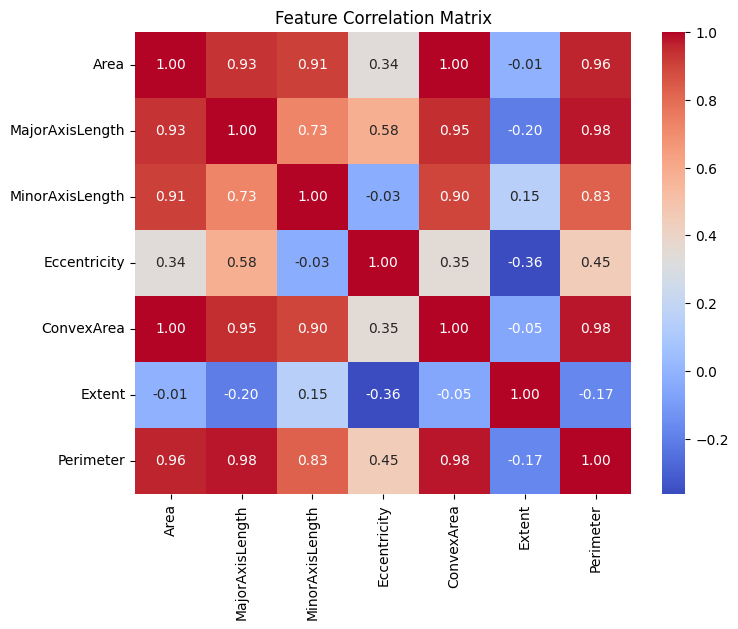

In [ ]:
# Compute the correlation matrix

correlation_matrix = X.corr()

print(correlation_matrix)

print()

import seaborn as sns
import matplotlib.pyplot as plt

# Display the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

3. Choose two features: Based on the correlation analysis, select two features that are
least correlated (e.g., variance and skewness) to visualize the Perceptron’s decision
boundary.

In [ ]:
# Select two features (for example (Area and ConvexArea) and two more pair) according to their correlation
# Select these features from the original feature set
# Find a pair of features such that the separation between classes is at its highest level. Similarly, find a pair of features such that the separation between classes is at its lowest level. Finally, find the pair of features with average separability.
# Split the selected features into training and validation sets if not done yet

import itertools
import pandas as pd

pairs = list(itertools.combinations(X.columns, 2))
results = []

for i1 , i2 in pairs:
  data = X[[i1,i2]]

  class1 = data[y.values.ravel() == 'Kecimen']
  class2 = data[y.values.ravel() == 'Besni']

  mean1 = class1.mean().values
  mean2 = class2.mean().values

  dist = np.linalg.norm(mean1 - mean2)**2
  var = class1.var().sum() + class2.var().sum()
  separability = dist / var

  results.append((i1, i2, separability))

df_sep = pd.DataFrame(results, columns=['Feature1', 'Feature2', 'Separability'])
df_sep_sorted = df_sep.sort_values(by='Separability', ascending=False)
print(df_sep_sorted)

print()

best_pair = df_sep_sorted.iloc[0][['Feature1', 'Feature2']].tolist()

worst_pair = df_sep_sorted.iloc[-1][['Feature1', 'Feature2']].tolist()

middle_index = len(df_sep_sorted) // 2
middle_pair = df_sep_sorted.iloc[middle_index][['Feature1', 'Feature2']].tolist()

print("Best pair:", best_pair)
print("Worst pair:", worst_pair)
print("Middle pair:", middle_pair)


           Feature1         Feature2  Separability
9   MajorAxisLength           Extent      1.653892
7   MajorAxisLength     Eccentricity      1.653891
10  MajorAxisLength        Perimeter      1.600048
20           Extent        Perimeter      1.590542
17     Eccentricity        Perimeter      1.590542
14  MinorAxisLength        Perimeter      1.551380
6   MajorAxisLength  MinorAxisLength      1.456181
5              Area        Perimeter      1.284032
0              Area  MajorAxisLength      1.284021
4              Area           Extent      1.284018
2              Area     Eccentricity      1.284018
1              Area  MinorAxisLength      1.284017
3              Area       ConvexArea      1.283494
19       ConvexArea        Perimeter      1.283027
8   MajorAxisLength       ConvexArea      1.283017
18       ConvexArea           Extent      1.283015
15     Eccentricity       ConvexArea      1.283015
12  MinorAxisLength       ConvexArea      1.283014
11  MinorAxisLength     Eccentr

#### Step 2: Train the Perceptron on Selected Features (10 points)

1. Retrain the Perceptron: After selecting two features, train the Perceptron using
only these two features. Use the same training and evaluation process as before,
but now the model will work in a two-dimensional feature space.

In [ ]:
## Train the Perceptron model on the training set.

from sklearn.model_selection import train_test_split

X_best = X[best_pair].to_numpy()

mean = np.mean(X_best, axis=0)
std = np.std(X_best, axis=0)
X_best_scaled = (X_best - mean) / std

y_numeric = np.where(y.to_numpy().ravel() == 'Kecimen', -1, 1)

X_train_best, X_test_best, y_train_best, y_test_best = train_test_split(
    X_best_scaled, y_numeric, test_size=0.2, random_state=42, shuffle=True
)

weights_best, bias_best = perceptron(X_train_best, y_train_best, learning_rate=0.01, epochs=5000,convert = False)

y_train_pred_best = predict(X_train_best, weights_best, bias_best)

accuracy_train_best = accuracy(y_train_best, y_train_pred_best)

print("Training Accuracy:", accuracy_train_best)

Training Accuracy: 0.7208333333333333


2. Visualize the decision boundary (hyperplane): Once the Perceptron is trained, plot
the decision boundary (hyperplane) to see how the Perceptron separates the two
classes in 2D.

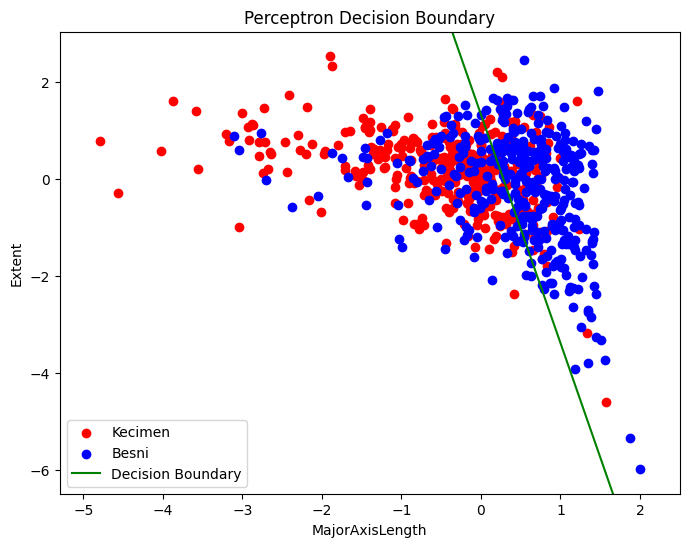

In [ ]:
# Function to plot the decision boundary
def plot_decision_boundary(X, y, model):
    weights, bias = model
    plt.figure(figsize=(8,6))

    plt.scatter(X[y==-1, 0], X[y==-1, 1], color='red', label='Kecimen')
    plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', label='Besni')

    x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
    y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5

    if abs(weights[1]) > 1e-6:
        x_values = np.linspace(x_min, x_max, 200)
        y_values = -(weights[0]*x_values + bias)/weights[1]
        plt.plot(x_values, y_values, color='green', label='Decision Boundary')
    else:
        x_val = -bias / weights[0]
        plt.axvline(x=x_val, color='green', label='Decision Boundary')

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel(best_pair[0])
    plt.ylabel(best_pair[1])
    plt.title("Perceptron Decision Boundary")
    plt.legend()
    plt.show()

# Plot the decision boundary using the selected features and trained model
plot_decision_boundary(X_train_best, y_train_best, (weights_best, bias_best))

#### Step 3: Experiment with Different Features (10 points)

After visualizing the decision boundary for one pair of features, try selecting different
combinations of features (e.g., Area and MaxorAxisLength) and retrain the Perceptron. Compare
how the hyperplane changes with different features. This helps in understanding how the
Perceptron’s decision-making process adapts to different feature sets.

Training Accuracy: 0.8541666666666666


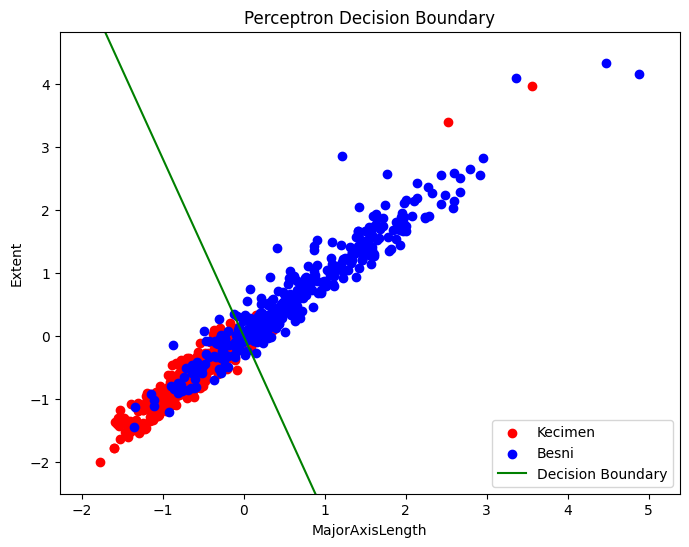

In [ ]:
X_random1_pair = df_sep_sorted.iloc[2][['Feature1', 'Feature2']].tolist()

X_random1 = X[X_random1_pair].to_numpy()

mean = np.mean(X_random1, axis=0)
std = np.std(X_random1, axis=0)
X_random1_scaled = (X_random1 - mean) / std

y_numeric = np.where(y.to_numpy().ravel() == 'Kecimen', -1, 1)

X_train_random1, X_test_random1, y_train_random1, y_test_random1 = train_test_split(
    X_random1_scaled, y_numeric, test_size=0.2, random_state=42 , shuffle=True
)

weights_random1, bias_random1 = perceptron(X_train_random1, y_train_random1, learning_rate=0.01, epochs=5000,convert = False)

y_train_pred_random1 = predict(X_train_random1, weights_random1, bias_random1)

accuracy_train_random1 = accuracy(y_train_random1, y_train_pred_random1)

print("Training Accuracy:", accuracy_train_random1)

# Plot the decision boundary using the selected features and trained model
plot_decision_boundary(X_train_random1, y_train_random1, (weights_random1, bias_random1))


Training Accuracy: 0.8166666666666667


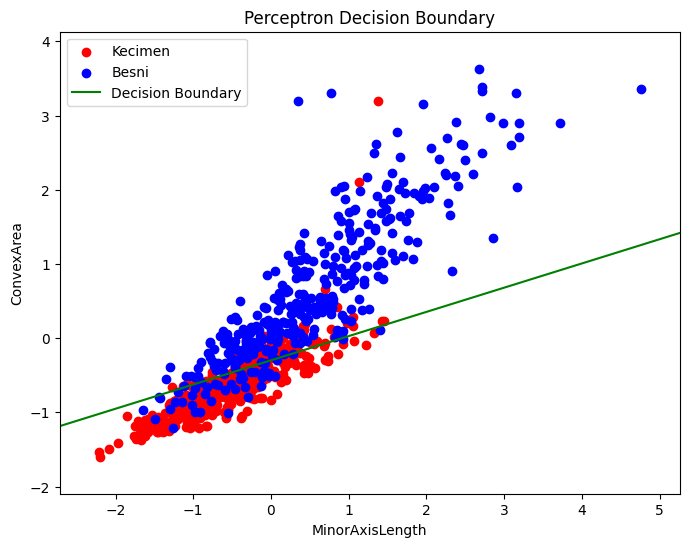

In [ ]:
X_random2_pair = best_pair = df_sep_sorted.iloc[-4][['Feature1', 'Feature2']].tolist()

X_random2 = X[X_random2_pair].to_numpy()

mean = np.mean(X_random2, axis=0)
std = np.std(X_random2, axis=0)
X_random1_scaled = (X_random2 - mean) / std

y_numeric = np.where(y.to_numpy().ravel() == 'Kecimen', -1, 1)

X_train_random2, X_test_random2, y_train_random2, y_test_random2 = train_test_split(
    X_random1_scaled, y_numeric, test_size=0.2, random_state=42 , shuffle=True
)

weights_random2, bias_random2 = perceptron(X_train_random2, y_train_random2, learning_rate=0.01, epochs=5000,convert = False)

y_train_pred_random2 = predict(X_train_random2, weights_random2, bias_random2)

accuracy_train_random2 = accuracy(y_train_random2, y_train_pred_random2)

print("Training Accuracy:", accuracy_train_random2)

# Plot the decision boundary using the selected features and trained model
plot_decision_boundary(X_train_random2, y_train_random2, (weights_random2, bias_random2))

* Answer the guiding questions:  
1. How does the decision boundary change when you use different pairs of features?  
  - The decision boundary depends directly on the features selected because the perceptron finds a linear hyperplane in the feature space that separates the classes. When using a “good” feature pair (high separability), the boundary is well-aligned between the two classes, resulting in fewer misclassifications. For a “poor” feature pair (low separability), the classes may overlap significantly, and the boundary either misclassifies many points or becomes nearly vertical/horizontal depending on which feature dominates, reducing classification performance.
2. Can you find a pair of features that leads to better separation between the two classes? Also explain why this feature pair causes the better separation.  
  - Yes, the pair with the highest separability metric usually provides the best separation. This happens because the means of the two classes are far apart in these feature dimensions, while the within-class variance is relatively small. Essentially, this feature pair maximizes the distance between class centers while minimizing spread within each class, making the linear boundary clearer and allowing the perceptron to classify more accurately.
3. If the classes cannot be linearly separated in a given pair of features, can we still talk about a linear relationship between them? Explain your reasoning.
  - Even if the classes cannot be perfectly linearly separated, a linear relationship between features may still exist. Linear separability refers specifically to the ability to separate classes, not the correlation or dependency between features. For example, two features might be strongly correlated (linearly dependent on each other), but the class labels may overlap along that line, preventing perfect classification. So, linear feature relationships and linear class separability are related but distinct concepts.


#### Bonus Step 4: Incrementally Add Data (+ 5 points)

1. Visualizing Incremental Learning: Another experiment to help understand the behavior of the Perceptron is to add data incrementally. Start with a small portion of the dataset and progressively add more data points to train the Perceptron.

* For example, draw the decision boundary using the first 5% of the data, then increase it by 10% increments, continuing the process until the entire dataset is used, and draw the decision boundary at each step.


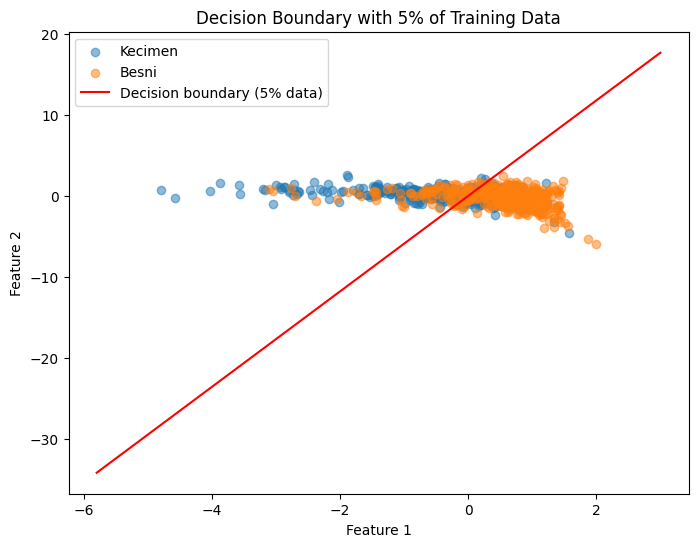

In [ ]:
n_samples = int(0.05 * X_train_best.shape[0])
X_subset = X_train_best[:n_samples]
y_subset = y_train_best[:n_samples]

# Train perceptron
weights, bias = perceptron(X_subset, y_subset, learning_rate=0.01, epochs=1000, convert=False)

# Prepare the decision boundary
x_vals = np.linspace(X_train_best[:,0].min()-1, X_train_best[:,0].max()+1, 200)
if weights[1] != 0:
    y_boundary = -(weights[0]/weights[1])*x_vals - bias/weights[1]

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X_train_best[y_train_best==-1, 0], X_train_best[y_train_best==-1, 1], label='Kecimen', alpha=0.5)
plt.scatter(X_train_best[y_train_best==1, 0], X_train_best[y_train_best==1, 1], label='Besni', alpha=0.5)
plt.plot(x_vals, y_boundary, 'r', label='Decision boundary (5% data)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary with 5% of Training Data')
plt.legend()
plt.show()


2. Observe how the decision boundary shifts: As you add more data, observe how the
hyperplane shifts and adapts to new points. This will help you understand how the
Perceptron continuously adjusts the boundary to separate the classes.

  - As more data points are added to the training process, the Perceptron continuously updates its weights and bias to better separate the two classes. With only a small portion of the data (e.g., 5%), the decision boundary is heavily influenced by the few points available, so it might be positioned inaccurately or skewed toward the initial samples. As additional data (10%, 20%, and so on) is introduced, the Perceptron adjusts the hyperplane to account for the new points, gradually shifting and rotating it to better accommodate the overall distribution of both classes. This incremental adaptation illustrates how the Perceptron learns from errors: misclassified points cause updates that move the boundary in a direction that reduces misclassification. Ultimately, with the full dataset, the hyperplane stabilizes at a position that maximizes the separation between the two classes in the feature space. Observing this process provides insight into the dynamics of online learning and the sensitivity of the Perceptron to the order and quantity of training data.

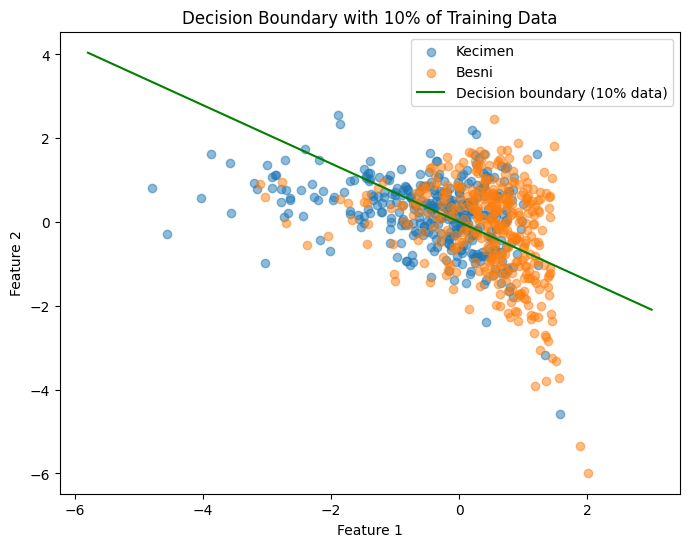

In [ ]:
n_samples = int(0.10 * X_train_best.shape[0])
X_subset = X_train_best[:n_samples]
y_subset = y_train_best[:n_samples]

# Train perceptron
weights, bias = perceptron(X_subset, y_subset, learning_rate=0.01, epochs=1000, convert=False)

# Decision boundary
if weights[1] != 0:
    y_boundary = -(weights[0]/weights[1])*x_vals - bias/weights[1]

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X_train_best[y_train_best==-1, 0], X_train_best[y_train_best==-1, 1], label='Kecimen', alpha=0.5)
plt.scatter(X_train_best[y_train_best==1, 0], X_train_best[y_train_best==1, 1], label='Besni', alpha=0.5)
plt.plot(x_vals, y_boundary, 'g', label='Decision boundary (10% data)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary with 10% of Training Data')
plt.legend()
plt.show()


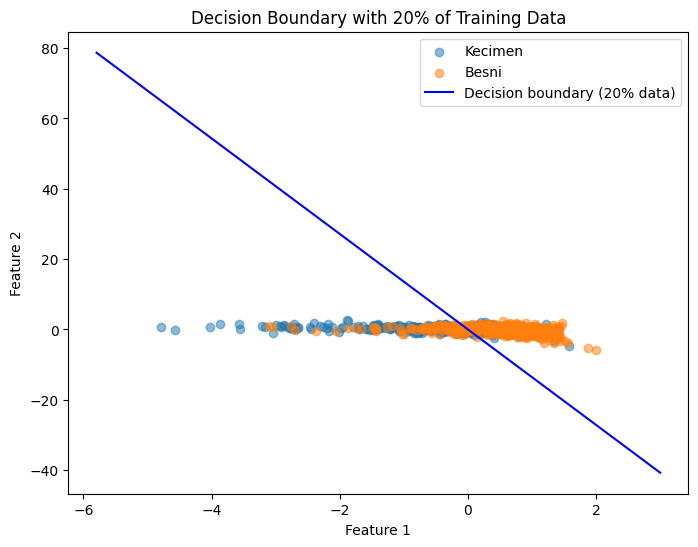

In [ ]:
n_samples = int(0.20 * X_train_best.shape[0])
X_subset = X_train_best[:n_samples]
y_subset = y_train_best[:n_samples]

# Train perceptron
weights, bias = perceptron(X_subset, y_subset, learning_rate=0.01, epochs=1000, convert=False)

# Decision boundary
if weights[1] != 0:
    y_boundary = -(weights[0]/weights[1])*x_vals - bias/weights[1]

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X_train_best[y_train_best==-1, 0], X_train_best[y_train_best==-1, 1], label='Kecimen', alpha=0.5)
plt.scatter(X_train_best[y_train_best==1, 0], X_train_best[y_train_best==1, 1], label='Besni', alpha=0.5)
plt.plot(x_vals, y_boundary, 'b', label='Decision boundary (20% data)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary with 20% of Training Data')
plt.legend()
plt.show()

#### Step 6: Fisher’s Linear Discriminant Projection (10 points)
* In this step, you will implement Fisher’s Linear Discriminant (LD) to project the
dataset onto a 1D space and visualize the distribution of the two classes in the projected
space using a histogram. The goal of Fisher’s LD is to find the direction in the feature
space that maximizes the separation between two classes while minimizing the variance
within each class. This technique projects the data onto a single dimension where the
separation between the classes is optimized.

In [ ]:
def fisher_ld_projection(X, y):
    """Compute Fisher's Linear Discriminant projection direction."""

    X = np.asarray(X)
    y = np.asarray(y).ravel()

    labels = np.unique(y)

    class1 = X[y == labels[0]]
    class2 = X[y == labels[1]]

    mean1 = np.mean(class1, axis=0)
    mean2 = np.mean(class2, axis=0)

    S1 = np.cov(class1, rowvar=False, bias=True)
    S2 = np.cov(class2, rowvar=False, bias=True)

    sum_of_S = S1 + S2

    mean_diff = (mean1 - mean2).reshape(-1, 1)
    w = np.linalg.inv(sum_of_S) @ mean_diff

    w = w / np.linalg.norm(w)

    return w.flatten()

def project_data(X, direction):
    """Project data onto the Fisher LD direction."""
    return X @ direction


In [ ]:
direction = fisher_ld_projection(X,y)

# Project the data onto the Fisher LD direction
projected_data = project_data(X,direction)


### Visualizations
#### 2D Feature Space (Optional but Recommended)
* While not mandatory, it can be highly instructive to visualize the projection direction computed by Fisher’s LD in the original 2D feature space. This will help you understand how the data is being projected onto a 1D space and why this direction is optimal for class separation.

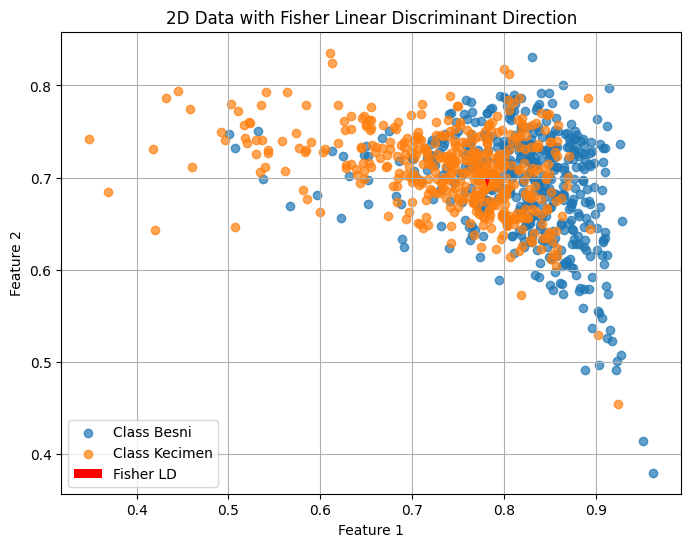

In [ ]:
# Plot the 2D data with the projection direction

# Hint: You can use plt.scatter() to plot the 2D data with its features
# You can find the mean of the entire dataset for placing the direction vector
# Hint: You can use plt.quiver() method to visualize the direction vector
# Do not forget to scale the direction vector to visualize it properly
scale = 4 # Adjust this to control the length of the direction line
X_2D = np.asarray(X_best)
y_array = np.asarray(y).ravel()

# Compute the mean of the dataset to place the vector
mean_point = np.mean(X_2D, axis=0)

# Scale the direction vector for visualization
direction_scaled = direction * scale

# Plot the points
plt.figure(figsize=(8,6))
labels = np.unique(y_array)
plt.scatter(X_2D[y_array == labels[0], 0], X_2D[y_array == labels[0], 1], alpha=0.7, label=f"Class {labels[0]}")
plt.scatter(X_2D[y_array == labels[1], 0], X_2D[y_array == labels[1], 1], alpha=0.7, label=f"Class {labels[1]}")

# Plot the Fisher LD direction vector from the mean
plt.quiver(mean_point[0], mean_point[1], direction_scaled[0], direction_scaled[1],
           color='red', scale_units='xy', angles='xy', scale=1, width=0.01, label='Fisher LD')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("2D Data with Fisher Linear Discriminant Direction")
plt.legend()
plt.grid(True)
plt.show()

### 1D Projected Space (Required)
* Plot a histogram showing the distribution of the
projected data for each class in the 1D space. The histogram will help you visualize
how well the two classes are separated by the Fisher’s LD projection.

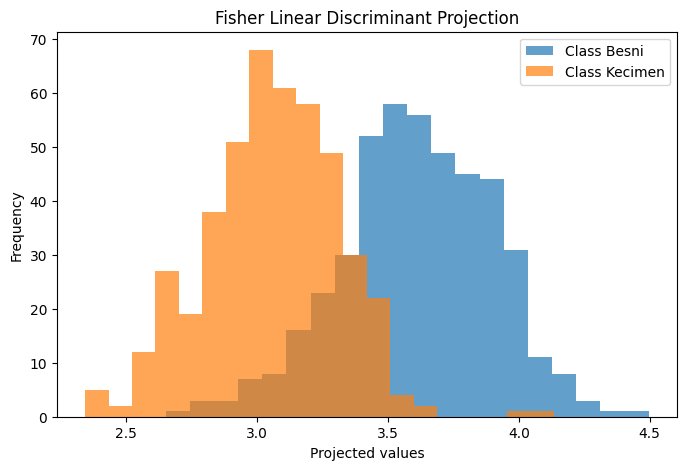

In [ ]:
# Plot the histogram of the projected data
y_array = np.asarray(y).ravel()

# Get unique labels
labels = np.unique(y_array)
class1_label = labels[0]
class2_label = labels[1]

# Separate the projected data by class
proj_class1 = projected_data[y_array == class1_label]
proj_class2 = projected_data[y_array == class2_label]

# Plot histograms
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(proj_class1, bins=20, alpha=0.7, label=f"Class {class1_label}")
plt.hist(proj_class2, bins=20, alpha=0.7, label=f"Class {class2_label}")
plt.xlabel("Projected values")
plt.ylabel("Frequency")
plt.title("Fisher Linear Discriminant Projection")
plt.legend()
plt.show()

Answer the guiding questions:
1. How well does Fisher’s LD separate the two classes in the 1D projected space?
  - Fisher’s Linear Discriminant aims to find a projection that maximizes the distance between class means while minimizing the within-class variance. In the 1D projected space, we can observe that the two classes are more clearly separated along the projection axis than in a random direction. If you plotted the histogram of the projected values, you should see that the peaks corresponding to the two classes are shifted apart with minimal overlap, indicating that the classes are distinguishable in the 1D space. Some small overlap may still exist if the classes are not perfectly linearly separable, but overall the separation is maximized in this direction.
2. Compare the separation of the two classes in the original 2D space (used in the
Perceptron) versus the 1D Fisher’s LD projection. What do you observe about the
class distributions in these spaces?
  - In the original 2D space, the class distributions may overlap in some regions, and it can be difficult to visually draw a single line that separates them perfectly. After projecting the data onto Fisher’s LD, the 2D data is reduced to 1D along the direction that maximizes class separability. In this 1D space, the distributions of the two classes become more distinct, with the means further apart relative to their variance. Essentially, Fisher LD finds the “best line” along which the classes are most separable, making it easier to distinguish them compared to the original 2D representation.